# Exercises XP

## Exercise 1: Data Exploration and Visualization

1. Objective: Familiarize yourself with the dataset.
2. Task:
* Load the dataset using image_dataset_from_directory.
* Print the number of images per class.
* Modify the visualize_images function to display a grid of 3x3 images for each flower class. Ensure the class name is displayed as the title for each grid.
* Analyze the images. What are some challenges you anticipate in classifying these flowers? (e.g., similar colors, shapes, variations within a species).


In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
!unzip FlowerClassification.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Data/train/iris/17779345575_de76cd0e3a_c.jpg  
  inflating: Data/train/iris/17826727169_991cf11676_c.jpg  
  inflating: Data/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: Data/train/iris/17885928250_451875aec2_c.jpg  
  inflating: Data/train/iris/17948299355_2161a031db_c.jpg  
  inflating: Data/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: Data/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: Data/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: Data/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: Data/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating: Data/train/iris/181379030_afebe26851_c.jpg  
  inflating: Data/train/iris/18141122602_118114762d_c.jpg  
  inflating: Data/train/iris/18256508742_af6a8f4222_c.jpg  
  inflating: Data/train/iris/18280071332_c6bc90d75a_c.jpg  
  inflating: Data/train/iris/18348714266_33a7bf205f_c.jpg  
  inflating: Data/train/iris/18504796248_

In [4]:
train = keras.preprocessing.image_dataset_from_directory('Data/train', image_size=(32, 32), batch_size=32)
val = keras.preprocessing.image_dataset_from_directory('Data/val', image_size=(32, 32), batch_size=32)


Found 13642 files belonging to 14 classes.
Found 98 files belonging to 14 classes.


In [5]:
class_names = train.class_names
print("Class names: ", class_names)

class_counts = {i: 0 for i in class_names}
for images, labels in train:
    for label in labels:
        class_counts[class_names[label]] += 1

print("Number of images per class in training set:", class_counts)

Class names:  ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']
Number of images per class in training set: {'astilbe': 726, 'bellflower': 872, 'black_eyed_susan': 986, 'calendula': 1011, 'california_poppy': 1021, 'carnation': 924, 'common_daisy': 978, 'coreopsis': 1035, 'dandelion': 1038, 'iris': 1041, 'rose': 986, 'sunflower': 1013, 'tulip': 1034, 'water_lily': 977}


In [6]:
def get_flower_images(dataset, class_name):
    flower_images = []

    for images, labels in dataset:
        # Filter out the images that belong to the class_name
        for i in range(len(images)):
            if class_names[labels[i].numpy()] == class_name:
                flower_images.append(images[i].numpy().astype("uint8"))

    return np.array(flower_images)


In [7]:
flowers = {}
for i in class_names:
  flowers[i] = get_flower_images(train, i)

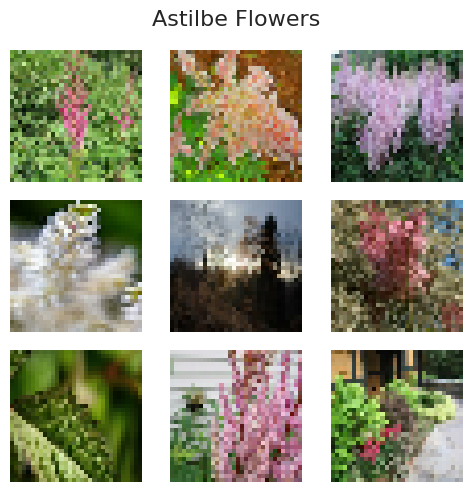

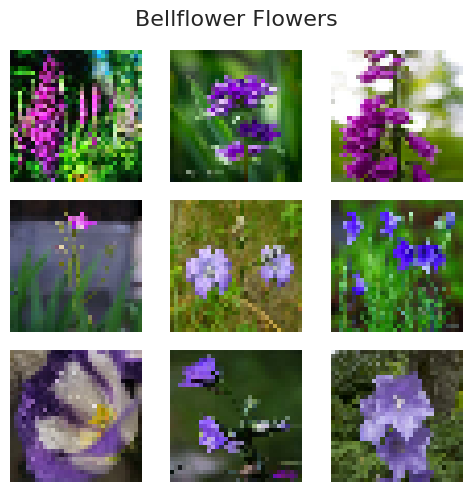

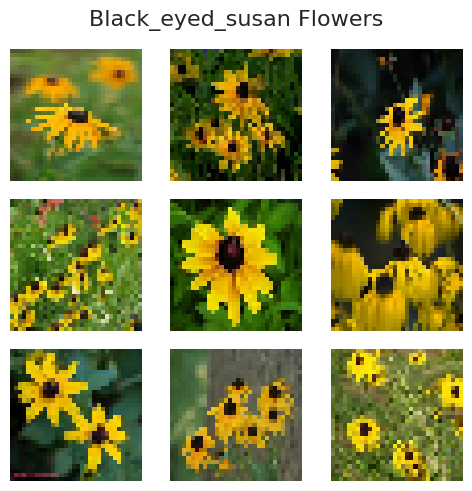

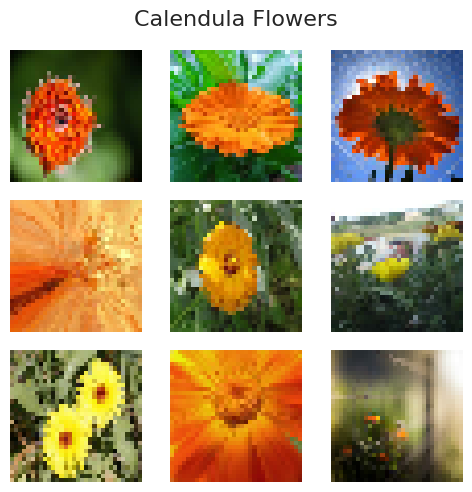

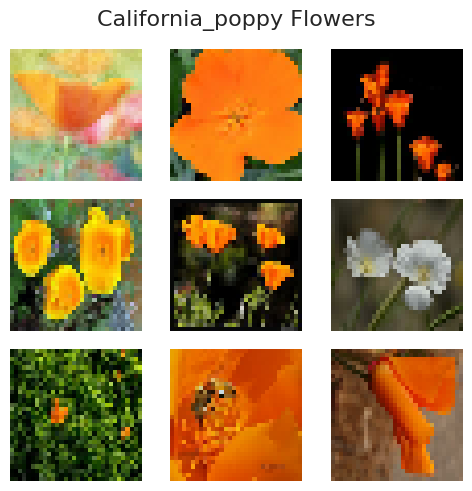

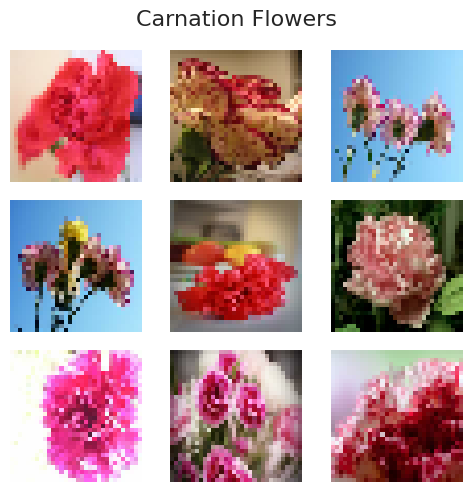

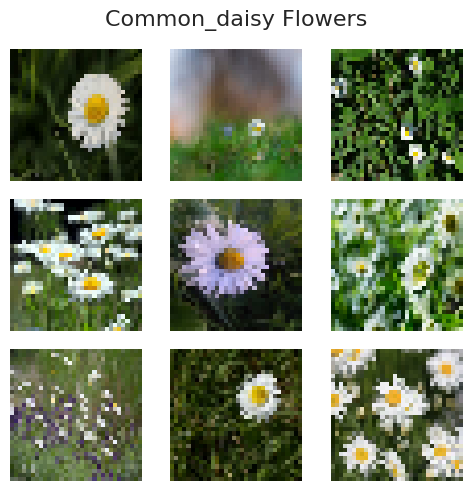

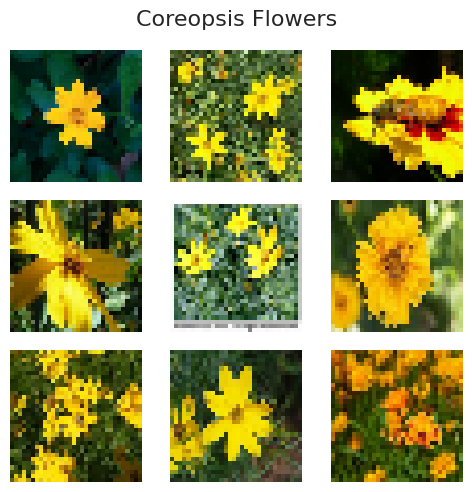

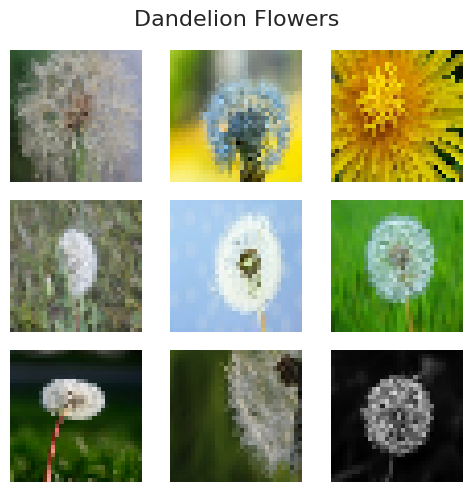

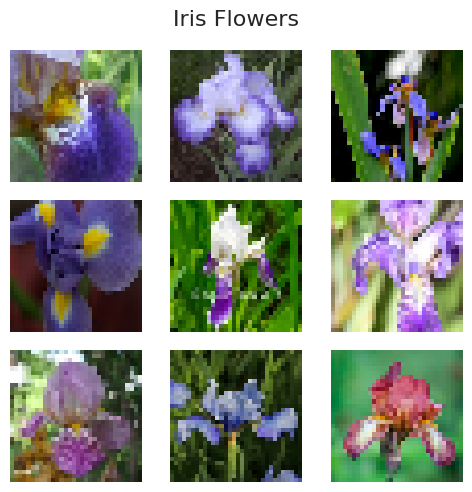

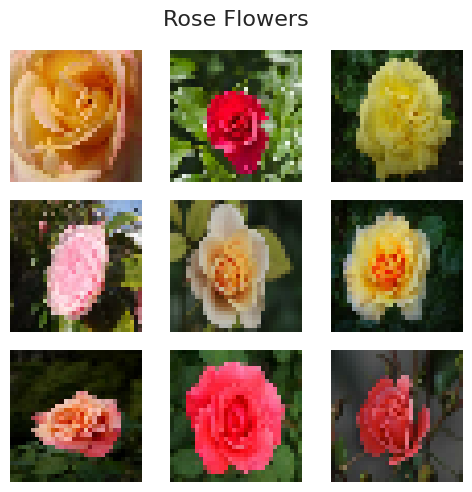

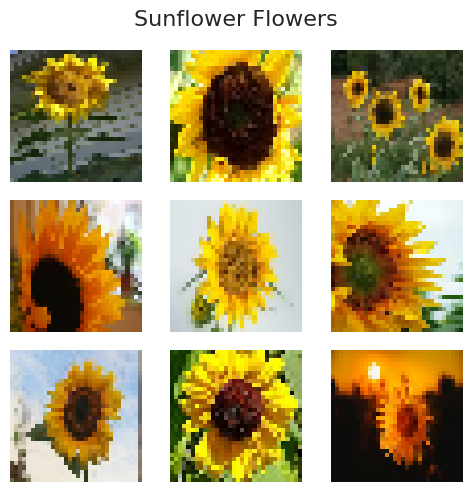

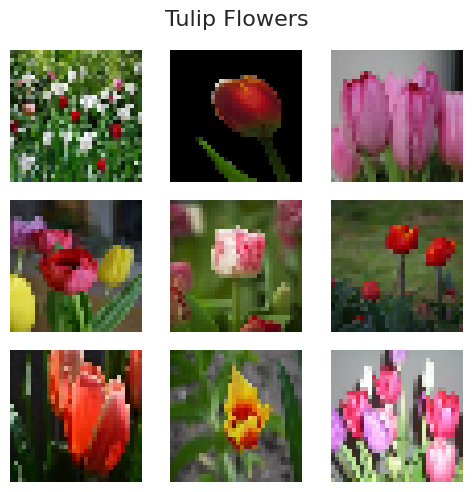

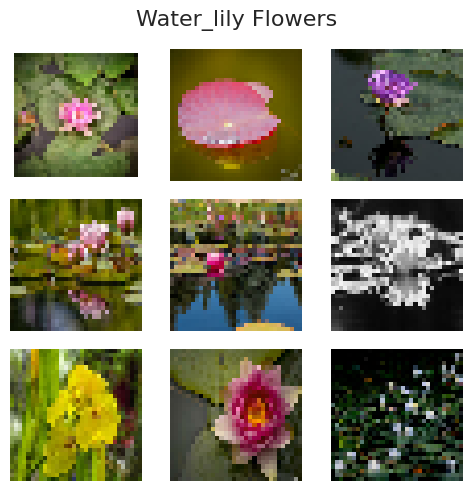

In [6]:
def plot_flower_class_grid(class_name, flowers, grid_size=(3, 3)):
    """
    Plot a 3x3 grid of images for a given flower class.

    Parameters:
    - class_name: The name of the flower class (str).
    - flowers: The dictionary containing flower class images (dict).
    - grid_size: The grid size for the subplot (default is 3x3).
    """
    # Get the images for the specific flower class
    images = flowers.get(class_name, [])

    # If there are fewer than 9 images, adjust the grid size
    num_images = min(len(images), grid_size[0] * grid_size[1])

    # Create a subplot with a grid of 3x3
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(5, 5))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Index for the image in the grid
            idx = i * grid_size[1] + j

            if idx < num_images:  # Check if there are enough images
                ax = axes[i, j]
                ax.imshow(images[idx])
                ax.axis('off')
            else:
                axes[i, j].axis('off')  # Hide axes if no image

    # Set the title for the whole plot
    plt.suptitle(f"{class_name.capitalize()} Flowers", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

for i in class_names:
  plot_flower_class_grid(i, flowers)

Some problems this dataset might face are the similitudes in color and shapes; there are plenty similar yellow flowers such as the Coreopsis or the Calendula, which also have similar shapes. The program might find challenging to classifying them correctly.

## Exercise 2: Model Architecture Design

1. Objective: Design a CNN architecture suitable for this task.
2. Task:

    Start with the provided model architecture.
    Experiment with the number of convolutional layers, filters, kernel sizes, and max-pooling layers.
    Try different combinations of dense layers and dropout rates.
    Consider adding Batch Normalization layers after convolutional or dense layers.
    Justify your architectural choices. Why did you choose these specific layers and parameters?




In [8]:
X_train = np.concatenate([flowers[i] for i in class_names])
y_train = np.array([class_names.index(i) for i in class_names for j in range(len(flowers[i]))])

In [9]:
flowers_test = {}
for i in class_names:
  flowers_test[i] = get_flower_images(val, i)

X_test = np.concatenate([flowers_test[i] for i in class_names])
y_test = np.array([class_names.index(i) for i in class_names for j in range(len(flowers_test[i]))])

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler


In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(14))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.0799 - loss: 4.3795 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.0846 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.0840 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.0882 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.0847 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.0884 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0864 - loss: 2.6391 - val_accuracy: 0.0918 - val_loss: 2.6391
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.0877 - loss: 2.6391 - 

This model did very badly. I'm going to try adding layers.

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

Epoch 1/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2070 - loss: 2.1971 - val_accuracy: 0.3776 - val_loss: 1.6412
Epoch 2/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3975 - loss: 1.6410 - val_accuracy: 0.4898 - val_loss: 1.3681
Epoch 3/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.4804 - loss: 1.4418 - val_accuracy: 0.5816 - val_loss: 1.2020
Epoch 4/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5294 - loss: 1.3189 - val_accuracy: 0.5816 - val_loss: 1.1489
Epoch 5/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.5521 - loss: 1.2731 - val_accuracy: 0.5510 - val_loss: 1.1399
Epoch 6/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5878 - loss: 1.1774 - val_accuracy: 0.6122 - val_loss: 1.0032
Epoch 7/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6146 - loss: 1.1122 - val_accuracy: 0.6020 - val_loss: 1.0434
Epoch 8/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.6257 - loss: 1.0692 - 

## Exercise 3: Hyperparameter Tuning

1. Objective: Optimize the model’s performance by tuning hyperparameters.
2. Task:

    - Experiment with different optimizers (e.g., Adam, RMSprop, SGD).
    - Vary the learning rate and batch size.
    - Try different loss functions (if applicable).
    - Use techniques like learning rate scheduling or early stopping to improve training.
    - Keep track of your experiments and their results. Which combination of hyperparameters yielded the best performance?


I'm going to try SGD:

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))  # Adjust to num_classes

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

Epoch 1/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.0981 - loss: 2.6123 - val_accuracy: 0.1939 - val_loss: 2.2087
Epoch 2/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1755 - loss: 2.2692 - val_accuracy: 0.3061 - val_loss: 1.8884
Epoch 3/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.2607 - loss: 1.9930 - val_accuracy: 0.3265 - val_loss: 1.7761
Epoch 4/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3036 - loss: 1.8859 - val_accuracy: 0.3061 - val_loss: 1.6956
Epoch 5/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3471 - loss: 1.8019 - val_accuracy: 0.3776 - val_loss: 1.7079
Epoch 6/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3712 - loss: 1.7372 - val_accuracy: 0.3878 - val_loss: 1.5690
Epoch 7/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3879 - loss: 1.6847 - val_accuracy: 0.3673 - val_loss: 1.5254
Epoch 8/20
853/853 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4183 - loss: 1.6258 - 

It didn't improve accuracy. Now I'll try RMSProp with fewer Epochs.

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

# Compile the model
model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.2096 - loss: 2.2172 - val_accuracy: 0.4082 - val_loss: 1.6570
Epoch 2/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.4217 - loss: 1.6344 - val_accuracy: 0.4082 - val_loss: 1.6850
Epoch 3/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4862 - loss: 1.4476 - val_accuracy: 0.5510 - val_loss: 1.2714
Epoch 4/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5233 - loss: 1.3557 - val_accuracy: 0.5204 - val_loss: 1.3076
Epoch 5/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5693 - loss: 1.2531 - val_accuracy: 0.5918 - val_loss: 1.2711
Epoch 6/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5884 - loss: 1.1897 - val_accuracy: 0.6224 - val_loss: 1.1844
Epoch 7/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6176 - loss: 1.1248 - val_accuracy: 0.6735 - val_loss: 0.9086
Epoch 8/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6315 - loss: 1.0572 - 

This optimizer did a better job than SGD and very similar to Adam. Now I will try using Adam and a scheduler to update the learning rate by Epoch.

In [47]:
def step_decay(epoch):
    initial_lr = 0.1  # Initial learning rate
    drop = 0.5        # Factor by which the learning rate will be reduced
    epochs_drop = 10   # Number of epochs after which the learning rate drops

    # Compute the new learning rate
    new_lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))

    return float(new_lr)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(step_decay)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[lr_scheduler], epochs=15, batch_size=16)

Epoch 1/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.0696 - loss: 10.9676 - val_accuracy: 0.0714 - val_loss: 2.6689 - learning_rate: 0.1000
Epoch 2/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.0706 - loss: 2.6572 - val_accuracy: 0.0714 - val_loss: 2.6640 - learning_rate: 0.1000
Epoch 3/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.0735 - loss: 2.6598 - val_accuracy: 0.0714 - val_loss: 2.6598 - learning_rate: 0.1000
Epoch 4/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.0708 - loss: 2.6593 - val_accuracy: 0.0714 - val_loss: 2.6688 - learning_rate: 0.1000
Epoch 5/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.0715 - loss: 2.6607 - val_accuracy: 0.0714 - val_loss: 2.6678 - learning_rate: 0.1000
Epoch 6/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.0779 - loss: 2.6571 - val_accuracy: 0.0714 - val_loss: 2.6688 - learning_rate: 0.1000
Epoch 7/15
853/853 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.0726 - 

This model did super poorly!

The model with better performance was the one using Adam optimizer and 20 Epochs.

## Exercise 4: Data Augmentation

1. Objective: Improve model generalization by applying data augmentation.
2. Task:

    Implement data augmentation using ImageDataGenerator.
    Explore different augmentation techniques:
        Rotation
        Flipping (horizontal/vertical)
        Zooming
        Shifting (width/height)
        Shearing
    Determine which augmentations are most effective for this dataset and explain why.


First, I will try a random rotation between 0 and 40º.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40)

In [19]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.1892 - loss: 2.2648 - val_accuracy: 0.4286 - val_loss: 1.6262
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3641 - loss: 1.7412 - val_accuracy: 0.4592 - val_loss: 1.4998
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.4483 - loss: 1.5459 - val_accuracy: 0.5408 - val_loss: 1.3800
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.4854 - loss: 1.4512 - val_accuracy: 0.5306 - val_loss: 1.3777
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.5156 - loss: 1.3655 - val_accuracy: 0.5918 - val_loss: 1.2543
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.5310 - loss: 1.3209 - val_accuracy: 0.5918 - val_loss: 1.2837
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.5541 - loss: 1.2607 - val_accuracy: 0.6020 - val_loss: 1.0725
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.5636 - loss: 1.2416 - 

The accuracy got slightly worse, so I will delete it.

Now, I'll add a shift:

In [23]:
datagen = ImageDataGenerator( width_shift_range=0.2,height_shift_range=0.2)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.1940 - loss: 2.2691 - val_accuracy: 0.3673 - val_loss: 1.7592
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.3441 - loss: 1.7969 - val_accuracy: 0.3673 - val_loss: 1.5219
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4123 - loss: 1.6240 - val_accuracy: 0.4490 - val_loss: 1.3780
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4593 - loss: 1.5159 - val_accuracy: 0.4898 - val_loss: 1.3382
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.4805 - loss: 1.4641 - val_accuracy: 0.5204 - val_loss: 1.4196
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4924 - loss: 1.4212 - val_accuracy: 0.5306 - val_loss: 1.2987
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.5164 - loss: 1.3595 - val_accuracy: 0.5612 - val_loss: 1.2097
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.5324 - loss: 1.3430 - 

Once again, the accuracy doesn't seem to be getting better.

Now I'll add a random zoom:

In [24]:
datagen = ImageDataGenerator(zoom_range=0.2)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=16)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


427/427 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.2051 - loss: 2.2294 - val_accuracy: 0.4184 - val_loss: 1.6267
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.3745 - loss: 1.6986 - val_accuracy: 0.4796 - val_loss: 1.4193
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.4648 - loss: 1.4975 - val_accuracy: 0.5102 - val_loss: 1.3643
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4890 - loss: 1.4168 - val_accuracy: 0.5102 - val_loss: 1.3840
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.5299 - loss: 1.3382 - val_accuracy: 0.5714 - val_loss: 1.2216
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5602 - loss: 1.2552 - val_accuracy: 0.5816 - val_loss: 1.1851
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.5673 - loss: 1.2334 - val_accuracy: 0.6122 - val_loss: 1.0125
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.5877 - loss: 1.1721 - val_accurac

The accuracy still doesn't beat the one without augmentation. Lastly, let's try shear:

In [26]:
datagen = ImageDataGenerator(shear_range=0.2)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=16)


Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.1931 - loss: 2.2775 - val_accuracy: 0.3673 - val_loss: 1.6159
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.3723 - loss: 1.7215 - val_accuracy: 0.4286 - val_loss: 1.4518
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4547 - loss: 1.5251 - val_accuracy: 0.4796 - val_loss: 1.3613
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4853 - loss: 1.4135 - val_accuracy: 0.5306 - val_loss: 1.3278
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5206 - loss: 1.3405 - val_accuracy: 0.5918 - val_loss: 1.2142
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5398 - loss: 1.2803 - val_accuracy: 0.6020 - val_loss: 1.1226
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.5746 - loss: 1.2217 - val_accuracy: 0.5816 - val_loss: 1.1608
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.5781 - loss: 1.2095 - 

Let's try once more with everything together

In [27]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, fill_mode='nearest' )
train_generator = datagen.flow(X_train, y_train, batch_size=32)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.1822 - loss: 2.2982 - val_accuracy: 0.3878 - val_loss: 1.6639
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.3366 - loss: 1.7789 - val_accuracy: 0.4388 - val_loss: 1.5566
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4241 - loss: 1.5921 - val_accuracy: 0.4490 - val_loss: 1.3873
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4612 - loss: 1.4923 - val_accuracy: 0.5000 - val_loss: 1.4137
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.4869 - loss: 1.4215 - val_accuracy: 0.5306 - val_loss: 1.3147
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.5021 - loss: 1.4077 - val_accuracy: 0.5612 - val_loss: 1.3336
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.5418 - loss: 1.3234 - val_accuracy: 0.5408 - val_loss: 1.3166
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.5340 - loss: 1.3154 - 

Data Augmentation didn't seem to improve the model. I will try one last model with 50 Epochs (it takes a good amount of minutes to run).

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2135 - loss: 2.1872 - val_accuracy: 0.3878 - val_loss: 1.5744
Epoch 2/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4171 - loss: 1.6089 - val_accuracy: 0.5102 - val_loss: 1.3119
Epoch 3/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4951 - loss: 1.4206 - val_accuracy: 0.5510 - val_loss: 1.2013
Epoch 4/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.5393 - loss: 1.2955 - val_accuracy: 0.5816 - val_loss: 1.1506
Epoch 5/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5750 - loss: 1.2174 - val_accuracy: 0.5816 - val_loss: 1.0792
Epoch 6/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5889 - loss: 1.1811 - val_accuracy: 0.5612 - val_loss: 1.1106
Epoch 7/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6171 - loss: 1.1231 - val_accuracy: 0.6224 - val_loss: 1.0516
Epoch 8/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6305 - loss: 1.0601 - 

## Exercise 5: Performance Evaluation and Analysis

1. Objective: Thoroughly evaluate the model’s performance.
2. Task:

    Plot the training and validation accuracy and loss curves. Analyze these plots for signs of overfitting or underfitting.

    Calculate other relevant metrics like precision, recall, F1-score, and confusion matrix. How does the model perform on each flower class? Are there any classes that are particularly difficult to classify?
    
    Visualize the model’s predictions on a set of test images. Identify any misclassifications and try to understand why they occurred.




In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f'Test loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7055 - loss: 1.3258
Test Accuracy: 0.7142857313156128
Test loss: 1.2264915704727173


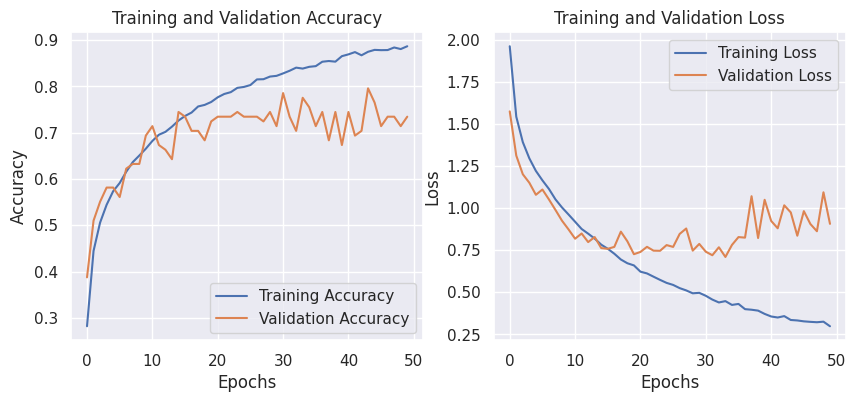

In [28]:
history_dict = history.history

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

There's overfitting and that why it got so accurate on the training set but somewhat less with the validation data. This can be fixed with some more time.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
                  precision    recall  f1-score   support

         astilbe       0.50      0.29      0.36         7
      bellflower       0.62      0.71      0.67         7
black_eyed_susan       1.00      0.86      0.92         7
       calendula       0.62      0.71      0.67         7
california_poppy       0.62      0.71      0.67         7
       carnation       0.75      0.43      0.55         7
    common_daisy       0.67      0.57      0.62         7
       coreopsis       0.75      0.86      0.80         7
       dandelion       1.00      1.00      1.00         7
            iris       1.00      1.00      1.00         7
            rose       0.50      0.86      0.63         7
       sunflower       0.83      0.71      0.77         7
           tulip       0.86      0.86      0.86         7
      water_lily       0.71      0.71      0.71         7

        accuracy                           0.73        98
       ma

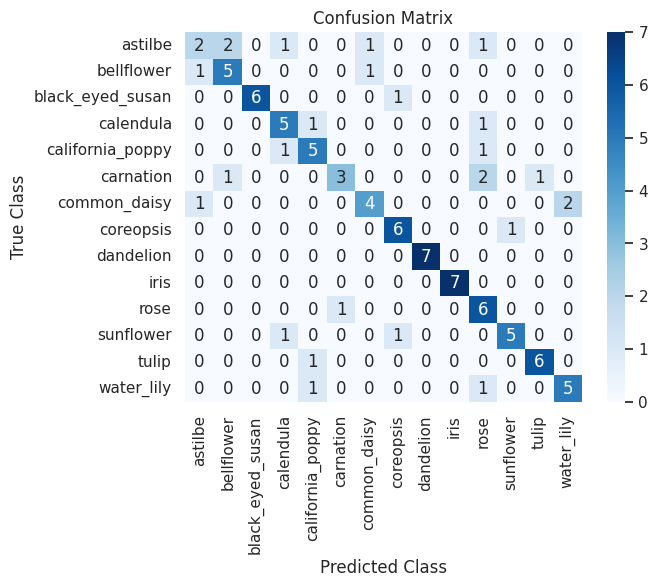

In [33]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices


print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=val.class_names))


cm = confusion_matrix(y_test, y_pred_classes) # Confusion Matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val.class_names, yticklabels=val.class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

On Black Eyed Susan, Dandelion and Iris the model performs perfectly. The model perform most poorly on the Astilbe flower.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


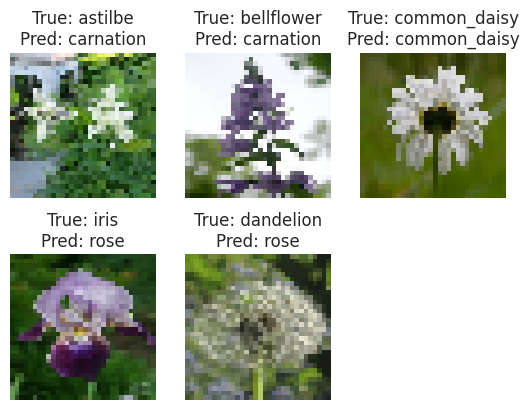

In [40]:
test_images, test_labels = next(iter(val))
predictions = model.predict(test_images)

num_images = 5


for i in range(num_images):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    true_label = test_labels[i].numpy()
    predicted_label = np.argmax(predictions[i])

    true_flower = val.class_names[true_label]
    predicted_flower = val.class_names[predicted_label]

    ax.set_title(f"True: {true_flower}\nPred: {predicted_flower}")
    ax.axis("off")

plt.show()